In [1]:
!pip3 install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [2]:
!pip3 install scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [3]:
!pip3 install --upgrade scikit-learn

In [4]:
!pip3 install imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [5]:
!pip3 install xgboost

  Using cached xgboost-2.0.1-py3-none-manylinux2014_x86_64.whl (297.1 MB)


In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preproc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [131]:
df=pd.read_csv('shared/complaints_25Nov21.csv')
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [132]:
df.shape

(207260, 18)

In [133]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [134]:
columns_to_drop = ['Date received', 'Consumer complaint narrative', 'Sub-issue', 'Company public response','Company','ZIP code','Consumer consent provided?', 'Date sent to company', 'Complaint ID']

In [135]:
df.drop(columns=columns_to_drop, inplace=True)

In [136]:
df.shape

(207260, 9)

In [137]:
df

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes,No
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes,No
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes,No
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes,No
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes,No
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes,No


In [138]:
df['Consumer disputed?'] = df['Consumer disputed?'].astype('category') 
df['Consumer disputed?-label'] = df['Consumer disputed?'].cat.codes 
df = pd.get_dummies(df, columns=["Timely response?"]) 
df

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Consumer disputed?,Consumer disputed?-label,Timely response?_No,Timely response?_Yes
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,No,0,False,True
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,No,0,False,True
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,No,0,False,True
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,1,False,True
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,No,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,No,0,False,True
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes,1,False,True
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,No,0,False,True
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,No,0,False,True


In [139]:
df.columns

Index(['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via',
       'Company response to consumer', 'Consumer disputed?',
       'Consumer disputed?-label', 'Timely response?_No',
       'Timely response?_Yes'],
      dtype='object')

In [140]:
categorical_columns = ['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via','Company response to consumer']
df[categorical_columns] = df[categorical_columns].astype('category')

In [141]:
print(df.dtypes)

Product                         category
Sub-product                     category
Issue                           category
State                           category
Tags                            category
Submitted via                   category
Company response to consumer    category
Consumer disputed?              category
Consumer disputed?-label            int8
Timely response?_No                 bool
Timely response?_Yes                bool
dtype: object


In [142]:
df = df.iloc[:,[7,8,0,1,2,3,4,5,6,9,10]]
df

,Consumer disputed?,Consumer disputed?-label,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?_No,Timely response?_Yes
0,No,0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,False,True
1,No,0,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,False,True
2,No,0,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,False,True
3,Yes,1,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,False,True
4,No,0,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,False,True
...,...,...,...,...,...,...,...,...,...,...,...
207255,No,0,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,False,True
207256,Yes,1,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,False,True
207257,No,0,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,False,True
207258,No,0,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,False,True


In [143]:
X = df.iloc[:,2:]
y = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)



In [144]:
y_test.value_counts(normalize=True)

Consumer disputed?-label
0    0.784136
1    0.215864
Name: proportion, dtype: float64

In [145]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X, y)

In [146]:
y_train.value_counts(normalize=True)

Consumer disputed?-label
0    0.5
1    0.5
Name: proportion, dtype: float64

In [147]:
X

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?_No,Timely response?_Yes
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,False,True
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,False,True
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,False,True
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,False,True
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,False,True
...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,False,True
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,False,True
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,False,True
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,False,True


In [148]:
y

0         0
1         0
2         0
3         1
4         0
         ..
207255    0
207256    1
207257    0
207258    0
207259    0
Name: Consumer disputed?-label, Length: 207260, dtype: int8

In [149]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [150]:
model_xgb = XGBClassifier(random_state = 123, enable_categorical=True)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [151]:
y_pred = model_xgb.predict(X_test)

In [152]:
class_report = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.55      0.67     32504
           1       0.30      0.69      0.41      8948

    accuracy                           0.58     41452
   macro avg       0.58      0.62      0.54     41452
weighted avg       0.74      0.58      0.61     41452



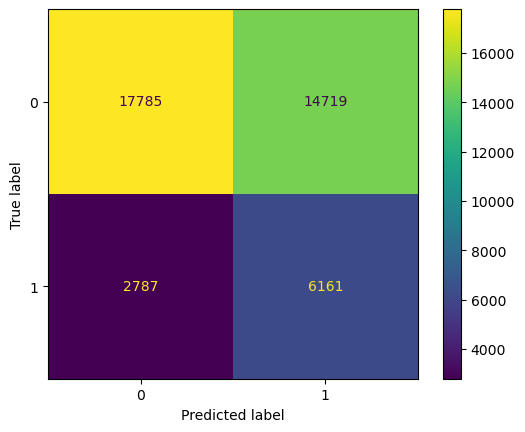

In [153]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [154]:
extra_diligence_cost = 90
default_non_disputed_cost = 100
default_disputed_cost = 600

total_cost_with_model = 0

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == 1: 
        total_cost_with_model += default_disputed_cost
    elif true_label == 0: 
        total_cost_with_model += default_non_disputed_cost
    elif true_label == 1 and predicted_label == 1:
        total_cost += extra_diligence_cost

print(f"Total cost to the banks without the model: ${total_cost_with_model}")

Total cost to the banks without the model: $8619200


In [155]:
cost_per_true_positive = 190
cost_per_true_negative = 100
cost_per_false_positive = 190
cost_per_false_negative = 600
extra_diligence_cost = 90 

total_cost = 0

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == 1 and predicted_label == 1:
        total_cost += cost_per_true_positive
    elif true_label == 0 and predicted_label == 0:
        total_cost += cost_per_true_negative
    elif true_label == 0 and predicted_label == 1:
        total_cost += cost_per_false_positive
    elif true_label == 1 and predicted_label == 0:
        total_cost += cost_per_false_negative
    elif predicted_label == 1:
        total_cost += extra_diligence_cost

print(f"Total cost to the banks based on model results: ${total_cost}")

Total cost to the banks based on model results: $7417900


In [156]:
from sklearn.metrics import confusion_matrix

cost_per_true_positive = 190
cost_per_true_negative = 100
cost_per_false_positive = 190
cost_per_false_negative = 600

thresholds = np.arange(0, 1.01, 0.01)

lowest_total_cost = float('inf')
best_threshold = None

for threshold in thresholds:
    y_pred_threshold = (model_xgb.predict_proba(X_test)[:, 1] > threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_threshold)
    
    total_cost = (
        cm[0, 0] * cost_per_true_negative +
        cm[1, 0] * cost_per_false_negative +
        cm[0, 1] * cost_per_false_positive +
        cm[1, 1] * cost_per_true_positive
    )
    
    if total_cost < lowest_total_cost:
        lowest_total_cost = total_cost
        best_threshold = threshold

print(f"Lowest total cost: ${lowest_total_cost:.2f} at threshold {best_threshold:.2f}")

Lowest total cost: $7357380.00 at threshold 0.46
